In [2]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [6]:
data.iloc[[1023]]

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
1023,12/6/2012,13.6888,10528750.0,144125953.0,718983.9167,3829.0,0.127314,0,250.0,11.6,...,1.646812,1.326895,29988,37201,9596721,13587,15280,3060984.558,218968.0,2997416.0


Plot


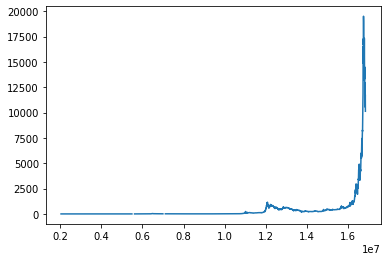

In [7]:
x = data.btc_market_price
y = data.btc_total_bitcoins
print("Plot")
plt.plot(y,x)
plt.show()

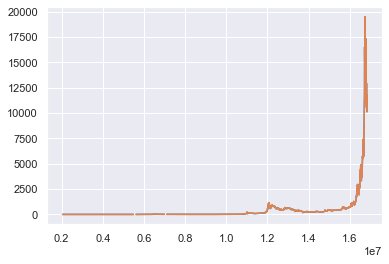

In [8]:
sns.set()
plt.plot(y,x)
sns.set_style('whitegrid')
plt.plot(y,x)
plt.show()

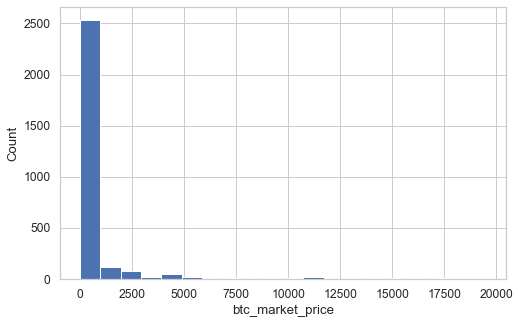

In [9]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['btc_market_price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='btc_market_price', ylabel='Count');

In [10]:
indices = data.columns

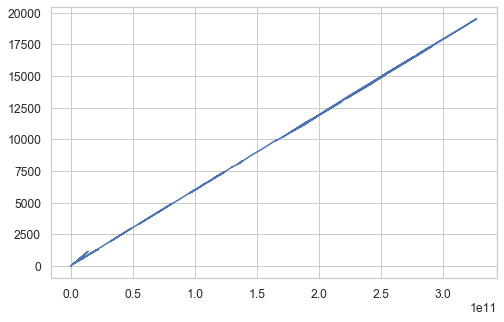

In [11]:
x=data['btc_market_cap']
y=data['btc_market_price']
plt.plot(x,y);

In [12]:
print("Are There Missing Data? :",data.isnull().any().any())
print(data.isnull().sum())

Are There Missing Data? : True
Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                   

In [13]:
data["btc_transaction_fees"].value_counts()

0.000000e+00    222
1.000000e-02      7
2.000000e-02      5
1.090000e-06      3
1.000000e-07      3
               ... 
2.335365e+02      1
1.659501e+01      1
1.300001e-01      1
3.330125e+00      1
2.306149e+02      1
Name: btc_transaction_fees, Length: 2651, dtype: int64

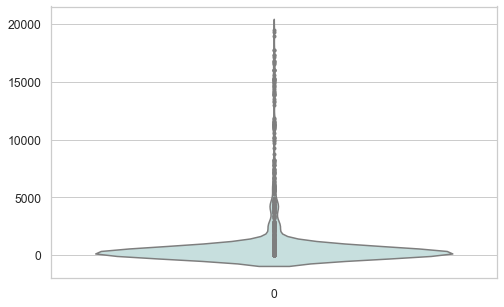

In [14]:
pal=sns.cubehelix_palette(20,rot=.95,dark=.8)
sns.violinplot(data=data.btc_market_price, palette=pal, inner="points")
plt.show()

In [15]:
data.corr(method ='pearson')

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


In [16]:
data.corr(method ='pearson')['btc_market_price'][:].sort_values(ascending=False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_trade_volume                                       0.868813
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806595
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674507
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

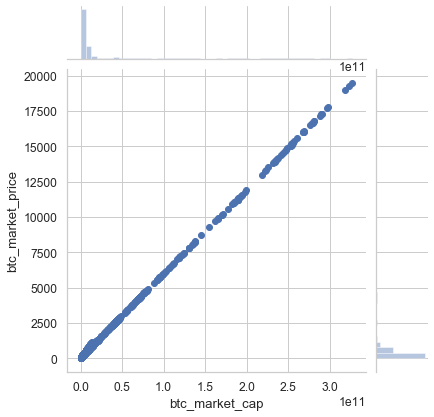

In [17]:
sns.jointplot(data=data,x='btc_market_cap', y='btc_market_price',kind='scatter')
plt.show()

In [18]:
required_data = data[["btc_market_price","btc_market_cap", "btc_n_transactions", "btc_miners_revenue", "btc_cost_per_transaction", "btc_difficulty", "btc_hash_rate", "btc_cost_per_transaction_percent"]]
required_data.head()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [19]:
required_data.isna().any()

btc_market_price                    False
btc_market_cap                      False
btc_n_transactions                  False
btc_miners_revenue                  False
btc_cost_per_transaction            False
btc_difficulty                       True
btc_hash_rate                       False
btc_cost_per_transaction_percent    False
dtype: bool

In [20]:
required_data.isna().sum()

btc_market_price                     0
btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
dtype: int64

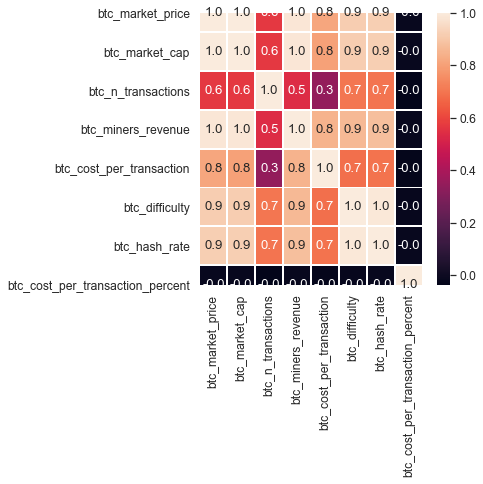

In [21]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(required_data.corr(),annot=True,linewidth=.85,fmt='.1f',ax=ax)
plt.show()

In [22]:
mean = required_data.btc_difficulty.mean()
mean

160635963100.33813

In [23]:
required_data.btc_difficulty.fillna(mean, inplace=True)
required_data.head()

,btc_market_price,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [24]:
required_data.isna().sum()

btc_market_price                    0
btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
dtype: int64

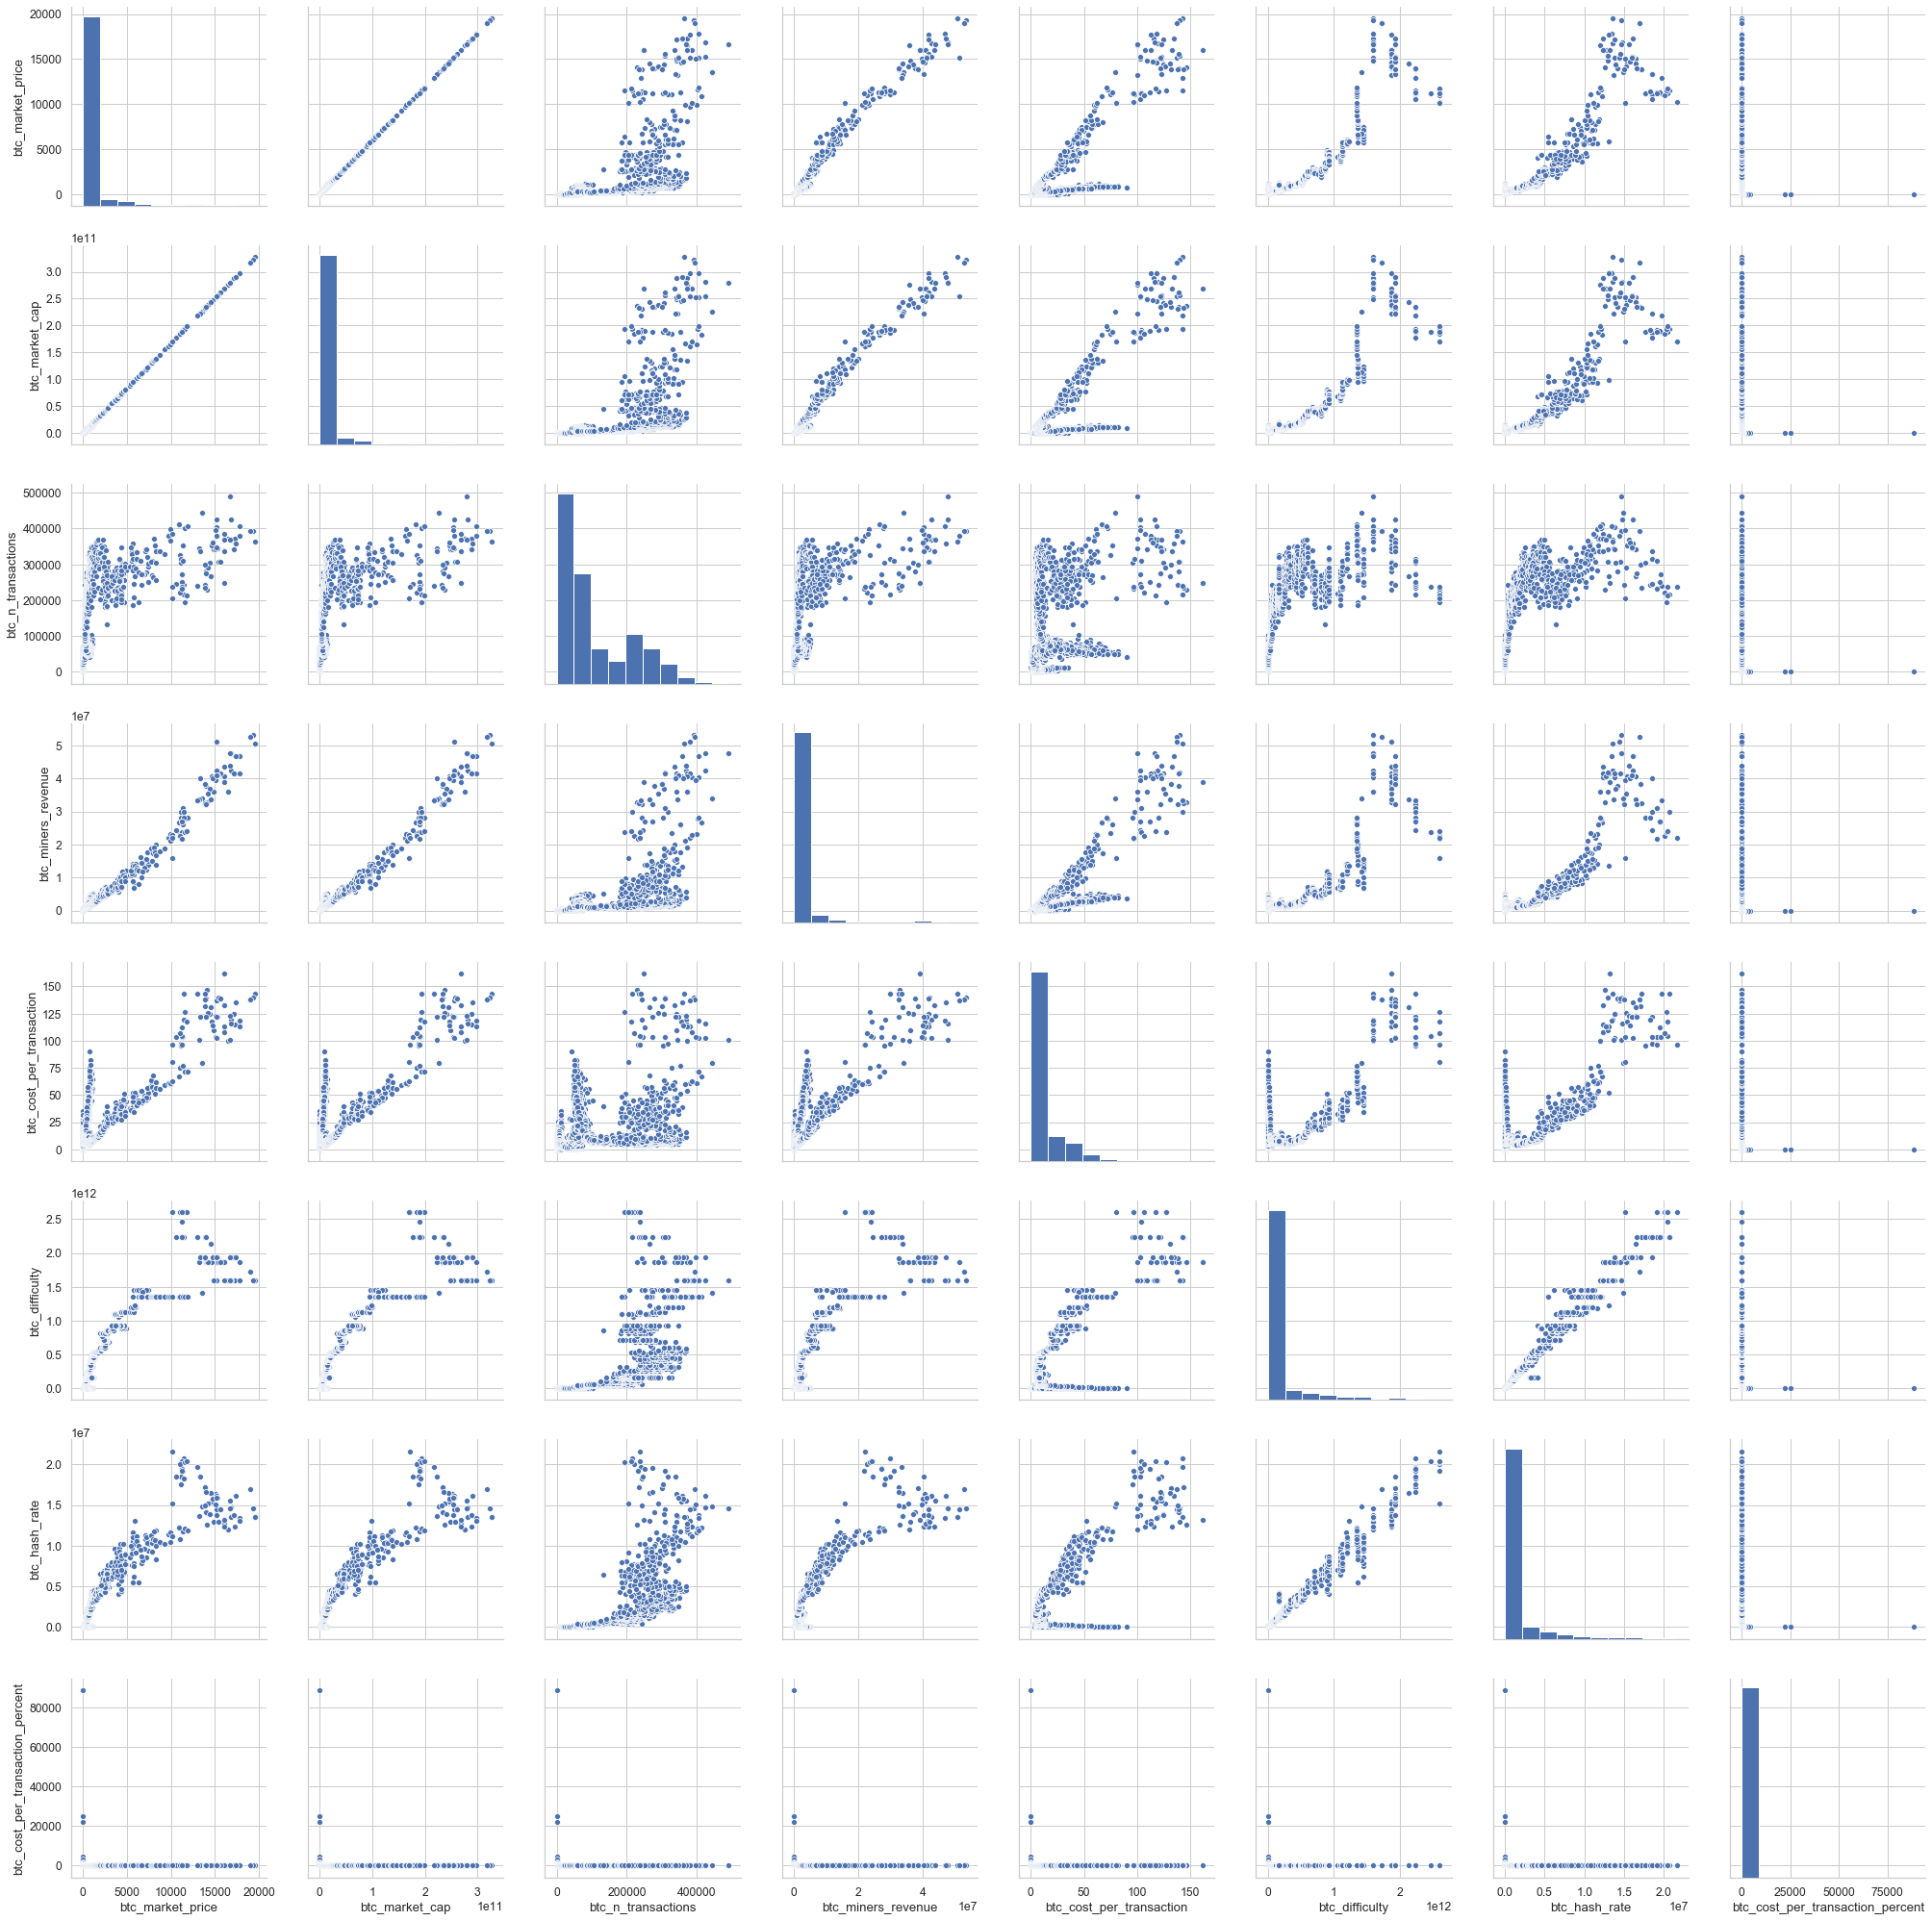

In [25]:
sns.pairplot(required_data,height=3.5)
plt.show()

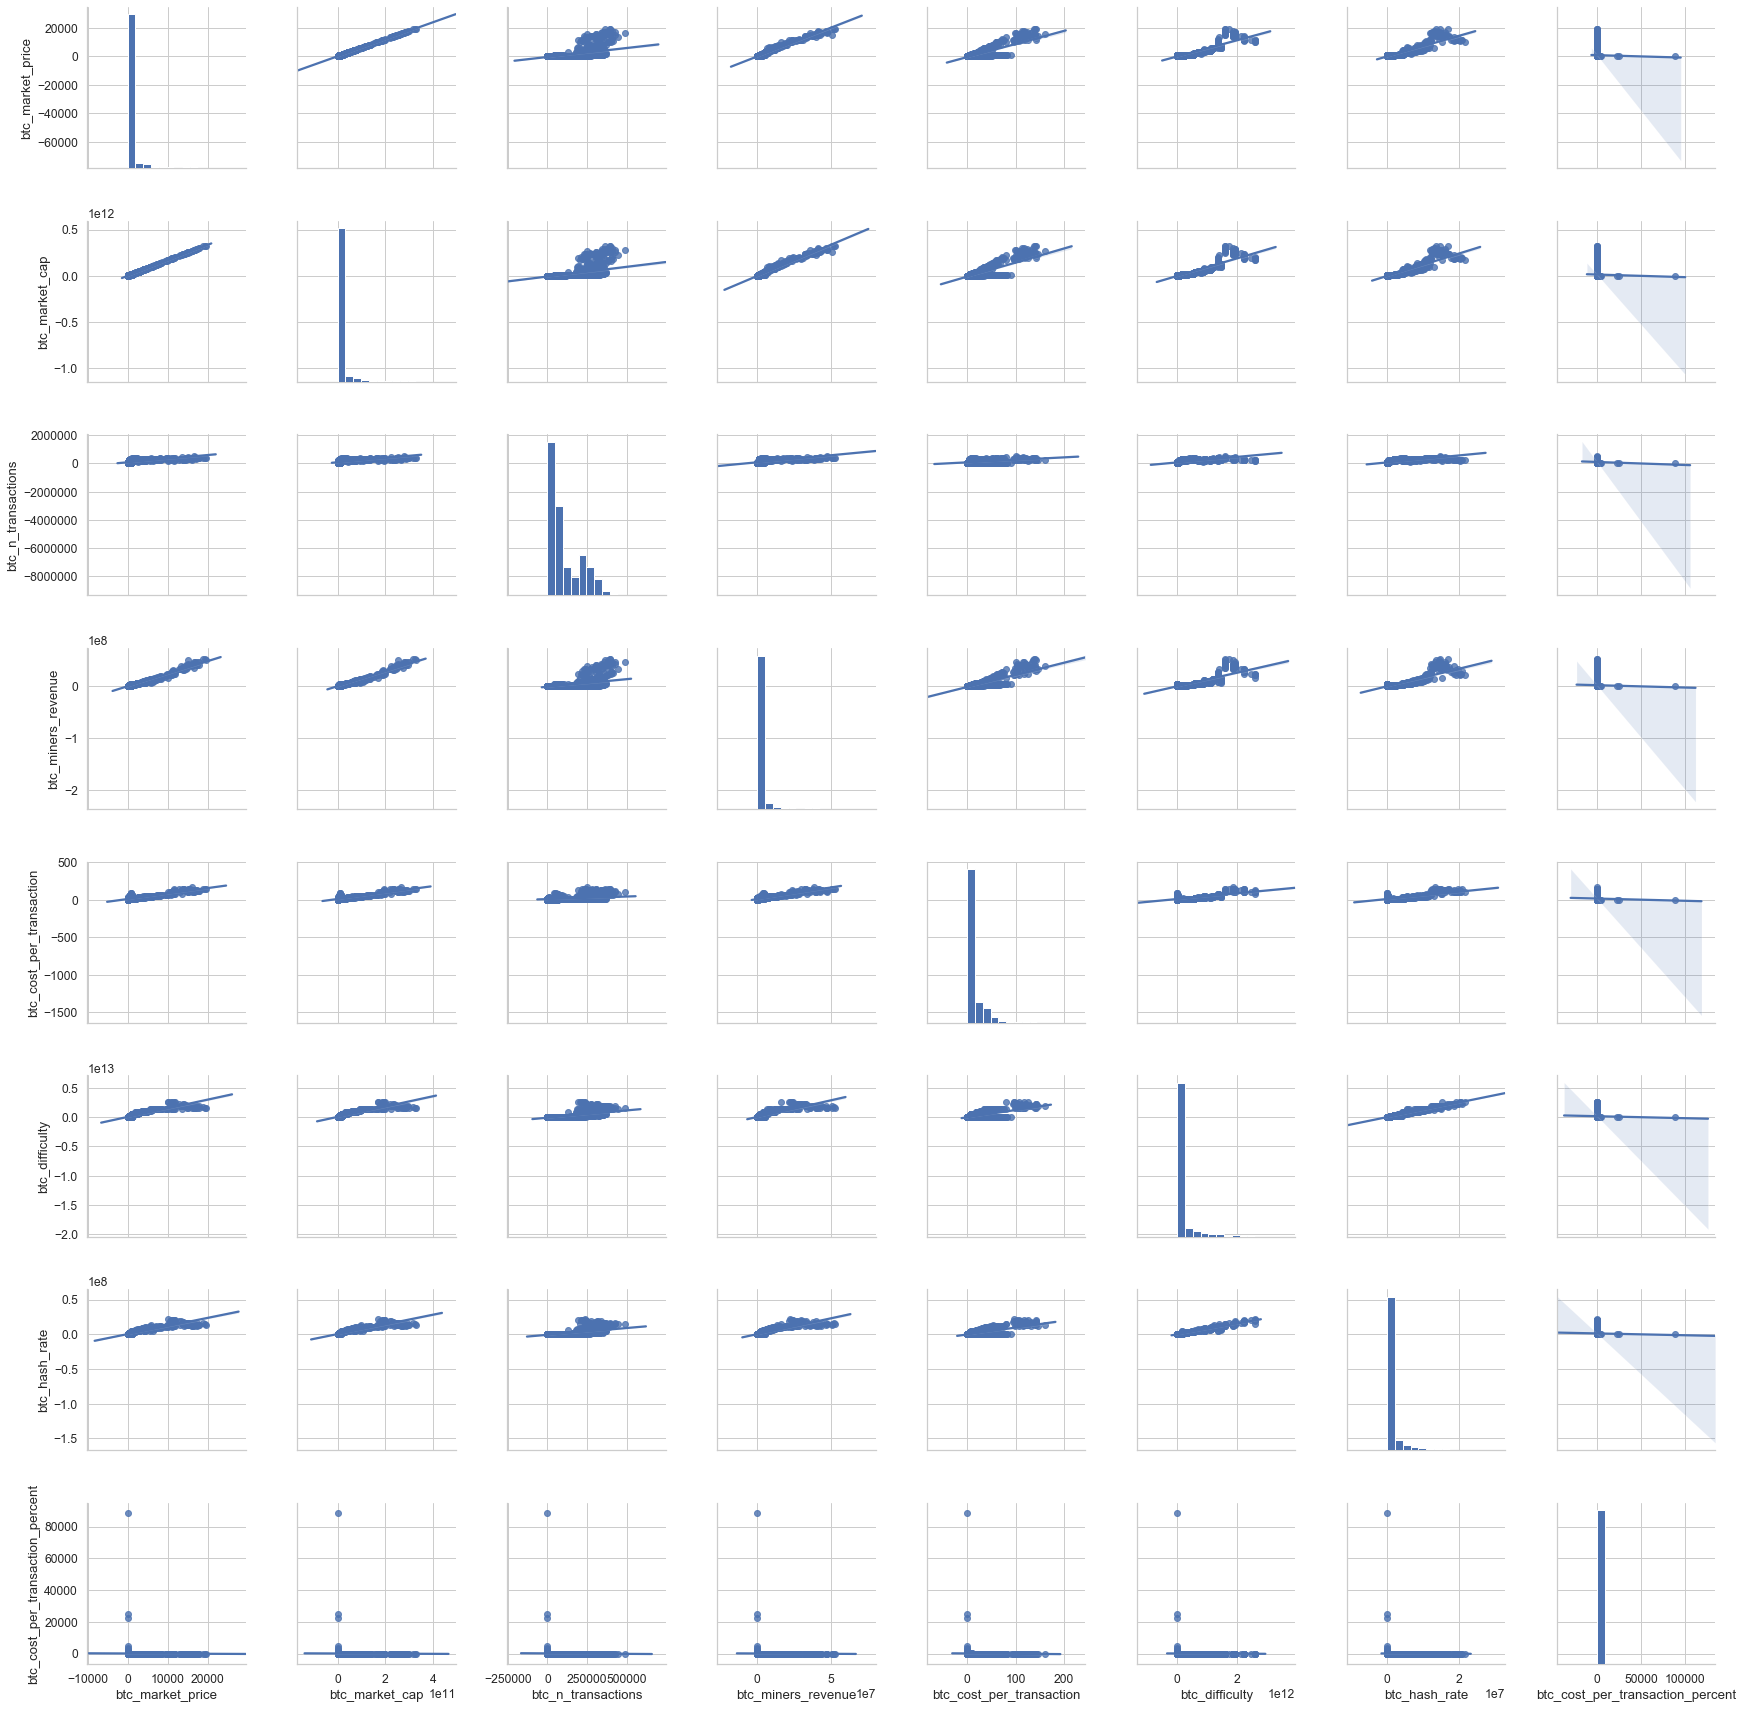

In [26]:
sns.pairplot(required_data,kind="reg",height=3)
plt.show()

In [27]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   btc_market_price                  2906 non-null   float64
 1   btc_market_cap                    2906 non-null   float64
 2   btc_n_transactions                2906 non-null   int64  
 3   btc_miners_revenue                2906 non-null   float64
 4   btc_cost_per_transaction          2906 non-null   float64
 5   btc_difficulty                    2906 non-null   float64
 6   btc_hash_rate                     2906 non-null   float64
 7   btc_cost_per_transaction_percent  2906 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 181.8 KB


In [29]:
x = required_data[["btc_market_cap","btc_n_transactions", "btc_miners_revenue", "btc_cost_per_transaction", "btc_difficulty", "btc_hash_rate", "btc_cost_per_transaction_percent"]]
y = required_data[["btc_market_price"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.01,random_state=10000000)

In [30]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
model = l_reg.fit(x_train,y_train)
print("Training completed")
model

Training completed


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Training Score: ', round(l_reg.score(x_train,y_train)*100,2))
print('Testing Score: ', round(l_reg.score(x_test,y_test)*100,2))

Training Score:  99.99
Testing Score:  100.0


In [32]:
y_predict=l_reg.predict(x_test)
y_predict

array([[ 7.42459913e+02],
       [ 2.24673453e+02],
       [ 8.48370700e+00],
       [ 4.16464701e+01],
       [ 1.08931919e+01],
       [-1.31428139e+01],
       [ 5.81346372e+00],
       [ 1.76437827e+01],
       [ 5.82551668e+02],
       [ 2.79316065e+02],
       [ 6.93894003e+02],
       [ 7.81516142e+00],
       [ 2.38261721e+02],
       [ 1.01350197e+04],
       [ 1.06877427e+01],
       [-2.79944005e+00],
       [-1.26334724e+00],
       [ 1.05759684e+01],
       [ 4.73380600e+02],
       [ 2.23889102e+02],
       [ 3.75470628e+01],
       [-1.24268930e+01],
       [ 1.27983079e+01],
       [ 4.32820926e+02],
       [ 2.37512504e+02],
       [-1.31373473e+01],
       [ 1.00507368e+03],
       [-1.31357132e+01],
       [ 1.01085607e+02],
       [ 4.34622877e+02]])

In [33]:
from sklearn import metrics  
metrics.mean_squared_error(y_test, y_predict)


144.9878885932438

In [34]:
r2_score(y_test, y_predict)

0.9999555402806363